In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Ensure necessary NLTK resources are downloaded
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize lemmatizer, stemmer, and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv('data/google/mhc_google_spell_corrected.csv')

# Remove rows where the 'text' column contains only whitespace or is blank
df['text'] = df['text'].astype(str).str.strip()  # Convert to string and strip whitespace
df = df[df['text'].str.len() > 0]  # Keep only rows with non-empty text

# Define a function to clean and process the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove quotations, numbers, and symbols (keeping only alphabetic characters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    words = text.split()
    
    # Remove stopwords and words with 2 characters or less
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Lemmatize the words (without stemming)
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the processed words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to each text column (assuming the text column is named 'text')
df['text'] = df['text'].apply(preprocess_text)

# Save the modified dataframe to a new CSV file
df.to_csv('data/google/mhc_revision_a.csv', index=False)

print("Text preprocessing completed and saved to 'data/google/mhc_revision_a.csv'")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duy68\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duy68\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text preprocessing completed and saved to 'data/google/mhc_revision_a.csv'


In [15]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('data/google/mhc_revision_a.csv')

# List to store the indices of problematic rows
error_indices = []

# Define a function to clean the text
def clean_text(text, index):
    try:
        # Ensure text is a string
        text = str(text)
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # Remove specific words (individually or repeated)
        words_to_remove = ['filler', 'br', 'gtpoplt']
        for word in words_to_remove:
            # Remove individual words and repeated sequences like fillerfillerfiller
            text = re.sub(rf'({word})+', '', text)
        
        # Remove sequences of repeated characters that are 3 or longer (e.g., dddddddddd becomes d)
        text = re.sub(r'(.)\1{2,}', r'\1', text)
        
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Remove words less than 2 characters in length
        text = ' '.join([word for word in text.split() if len(word) > 1])
        
        return text
    
    except Exception as e:
        # Log the index of the problematic row
        error_indices.append(index)
        return None  # Skip this row

# Apply the cleaning function to the 'text' column, logging any errors
df['text'] = [clean_text(text, i) for i, text in enumerate(df['text'])]

# Remove rows where the 'text' column is blank or contains only whitespace
df['text'] = df['text'].astype(str).str.strip()
df = df[df['text'].str.len() > 0]

# Log problematic rows
if error_indices:
    print(f"Rows with errors: {error_indices}")

# Additional step: Remove any 2 character or fewer words again before saving
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

# Print the new shape of the dataframe
print("New DataFrame shape:", df.shape)

# Save the cleaned dataframe to a new CSV file
df.to_csv('data/google/mhc_revision_b.csv', index=False)

print("Cleaned text saved to 'data/google/mhc_revision_b.csv'")

New DataFrame shape: (27976, 2)
Cleaned text saved to 'data/google/mhc_revision_b.csv'


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['document_length'].quantile(0.25)
Q3 = df['document_length'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['document_length'] >= lower_bound) & (df['document_length'] <= upper_bound)]

# Print the shape of the DataFrame after dropping outliers
print(f"DataFrame shape after removing outliers: {df.shape}")

Class Distribution:
 label
0    0.505344
1    0.494656
Name: proportion, dtype: float64

Total Tokens: 1836976
Unique Tokens: 54900
DataFrame shape after removing outliers: (25793, 5)


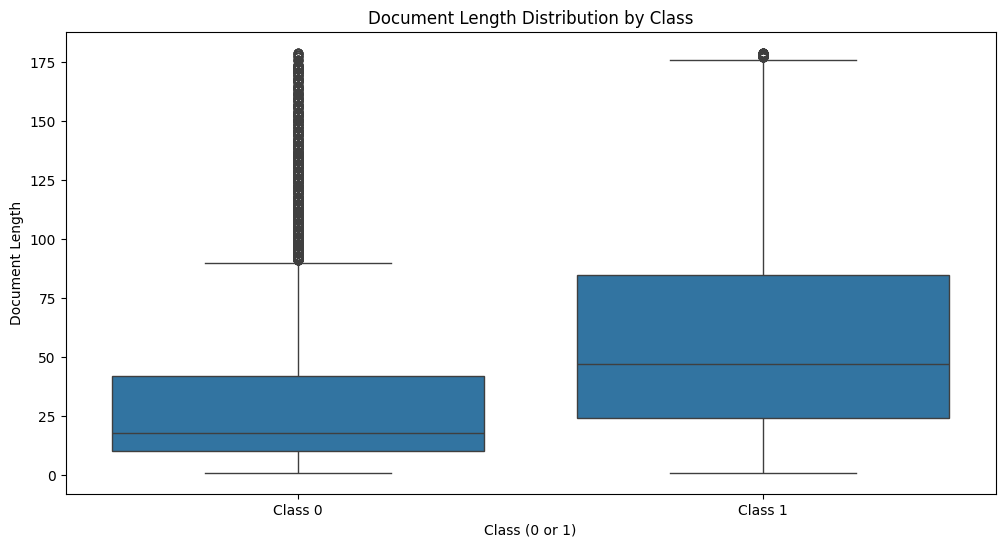

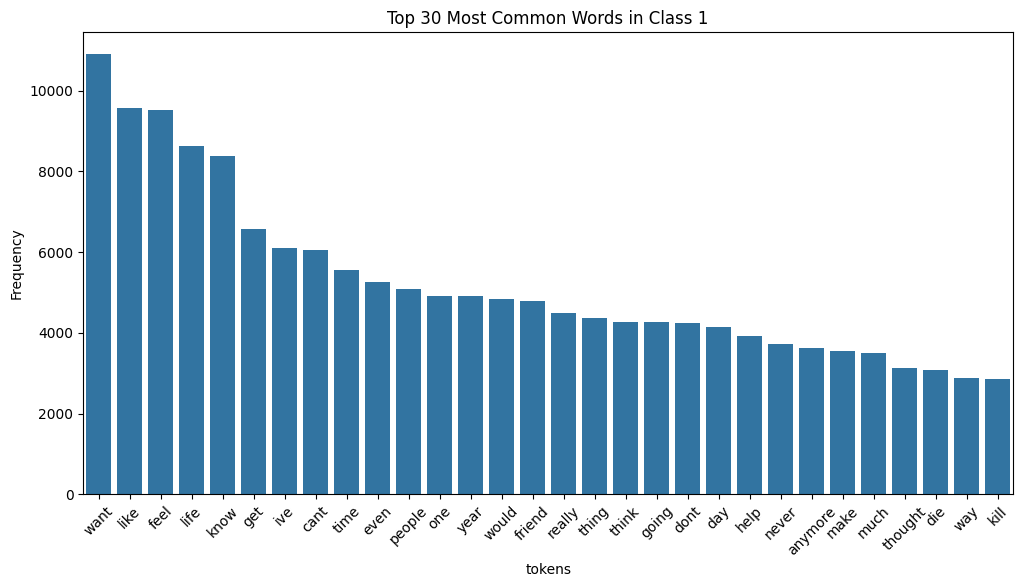

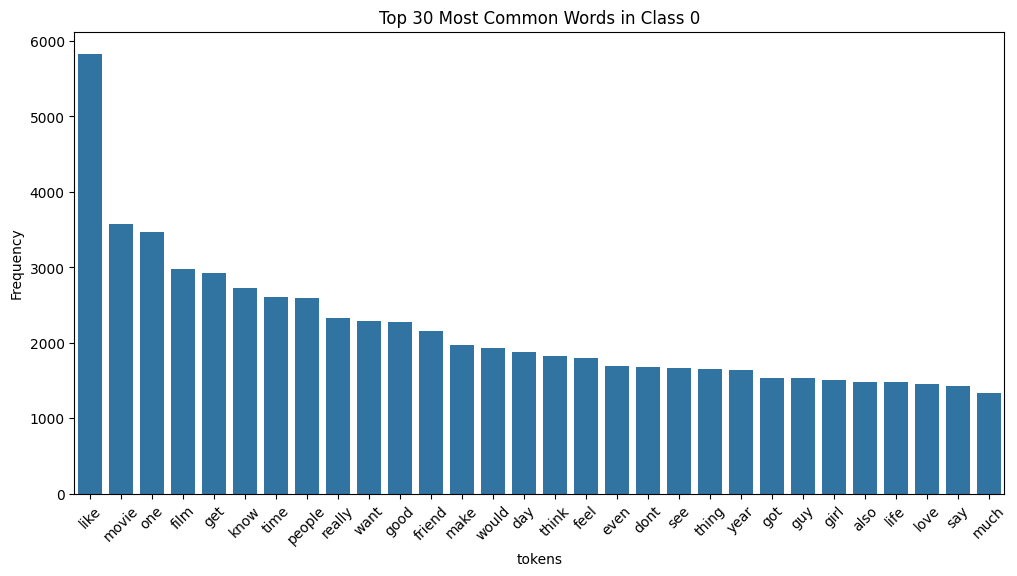


Top 10 2-grams for Class 1:
[(('feel', 'like'), 3760), (('want', 'die'), 1050), (('dont', 'know'), 1028), (('dont', 'want'), 849), (('get', 'better'), 710), (('year', 'old'), 604), (('every', 'day'), 556), (('suicidal', 'thought'), 526), (('want', 'kill'), 477), (('year', 'ago'), 452)]

Top 10 2-grams for Class 0:
[(('feel', 'like'), 578), (('dont', 'know'), 366), (('year', 'old'), 276), (('first', 'time'), 193), (('even', 'though'), 190), (('best', 'friend'), 171), (('anyone', 'else'), 171), (('eve', 'eve'), 169), (('need', 'help'), 167), (('look', 'like'), 162)]


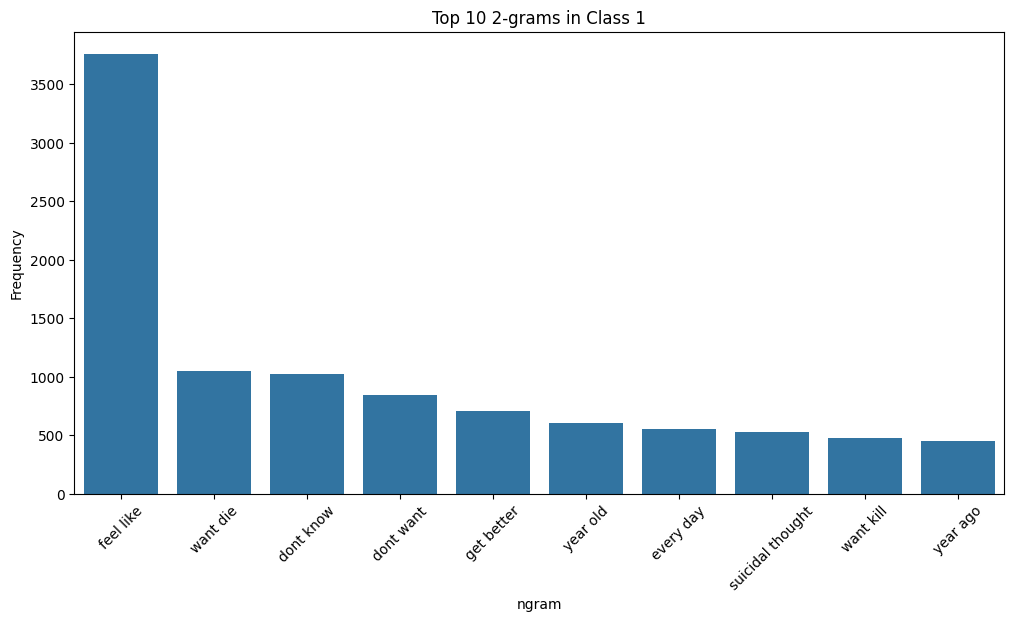

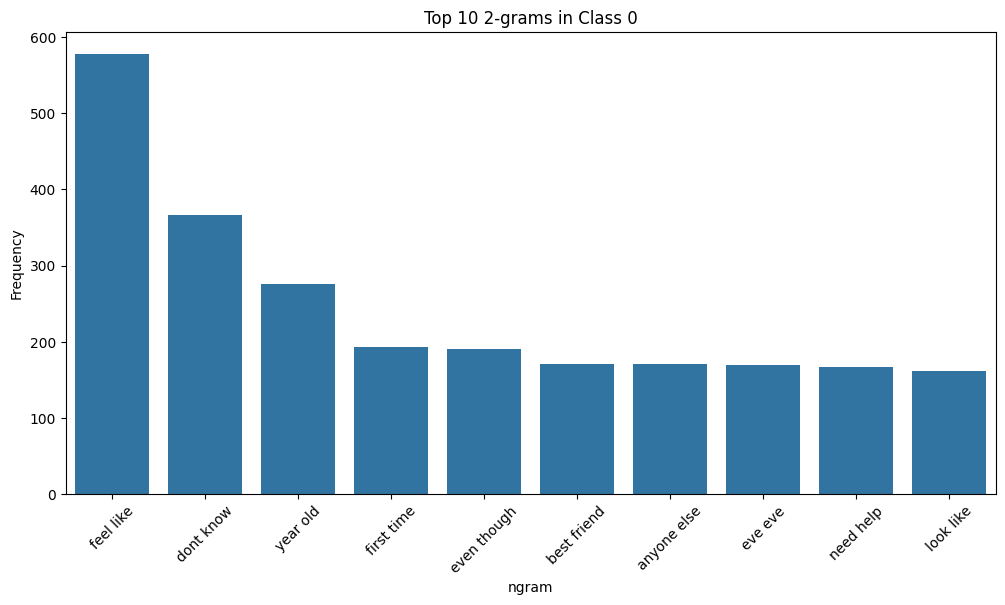


Top 10 3-grams for Class 1:
[(('cant', 'take', 'anymore'), 132), (('want', 'die', 'want'), 120), (('need', 'someone', 'talk'), 107), (('every', 'single', 'day'), 106), (('feel', 'like', 'ive'), 105), (('make', 'feel', 'like'), 97), (('help', 'please', 'help'), 96), (('dont', 'even', 'know'), 94), (('need', 'help', 'need'), 93), (('please', 'help', 'please'), 90)]

Top 10 3-grams for Class 0:
[(('eve', 'eve', 'eve'), 167), (('monitor', 'monitor', 'monitor'), 144), (('love', 'love', 'love'), 121), (('horny', 'horny', 'horny'), 82), (('ampxb', 'ampxb', 'ampxb'), 81), (('really', 'really', 'really'), 63), (('beautiful', 'beautiful', 'beautiful'), 50), (('stressed', 'stressed', 'stressed'), 47), (('uh', 'uh', 'uh'), 44), (('anyone', 'wanna', 'talk'), 43)]


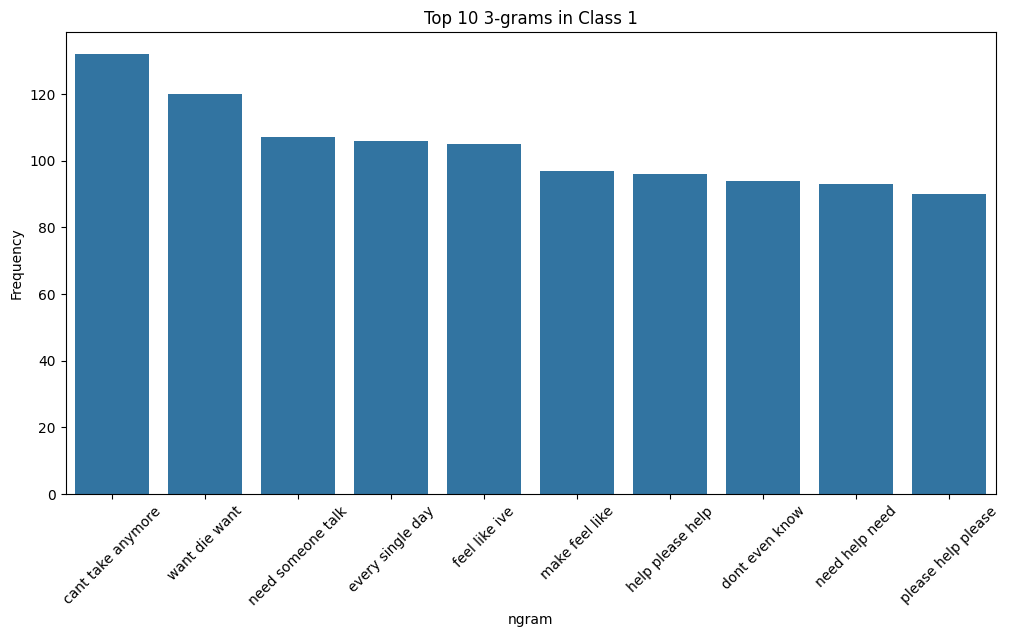

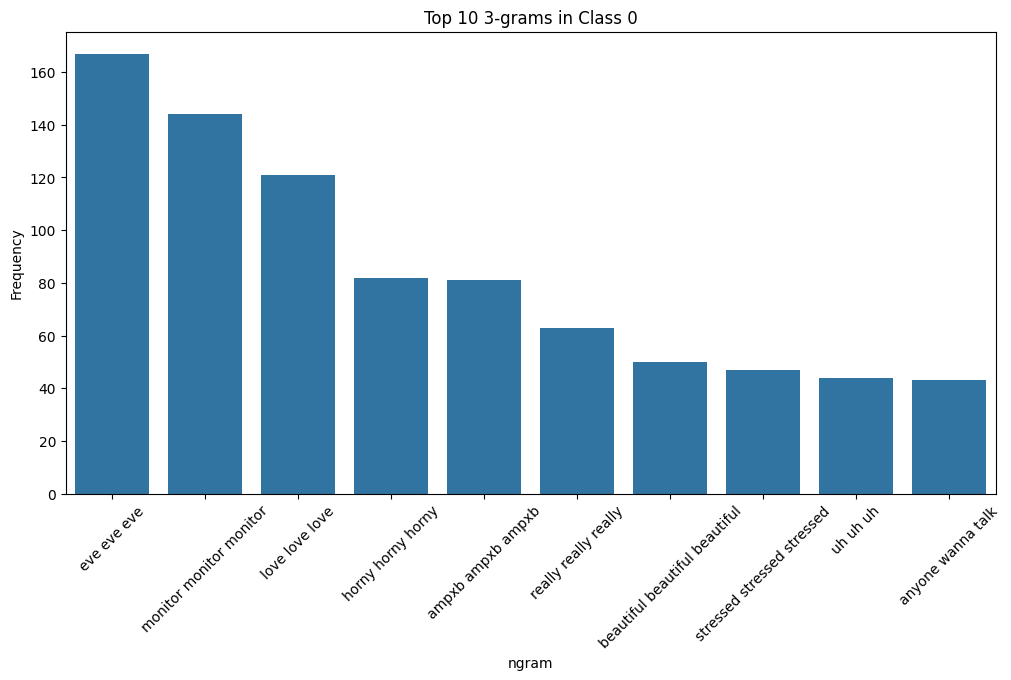


Top 10 4-grams for Class 1:
[(('please', 'help', 'please', 'help'), 86), (('need', 'help', 'need', 'help'), 86), (('help', 'please', 'help', 'please'), 85), (('pain', 'sad', 'pain', 'sad'), 84), (('sad', 'pain', 'sad', 'pain'), 84), (('help', 'need', 'help', 'need'), 82), (('done', 'done', 'done', 'done'), 76), (('dont', 'want', 'live', 'anymore'), 23), (('dont', 'know', 'much', 'longer'), 23), (('want', 'die', 'want', 'die'), 22)]

Top 10 4-grams for Class 0:
[(('eve', 'eve', 'eve', 'eve'), 165), (('monitor', 'monitor', 'monitor', 'monitor'), 143), (('love', 'love', 'love', 'love'), 118), (('horny', 'horny', 'horny', 'horny'), 81), (('ampxb', 'ampxb', 'ampxb', 'ampxb'), 75), (('really', 'really', 'really', 'really'), 60), (('beautiful', 'beautiful', 'beautiful', 'beautiful'), 49), (('stressed', 'stressed', 'stressed', 'stressed'), 46), (('merry', 'christmas', 'merry', 'christmas'), 42), (('christmas', 'merry', 'christmas', 'merry'), 41)]


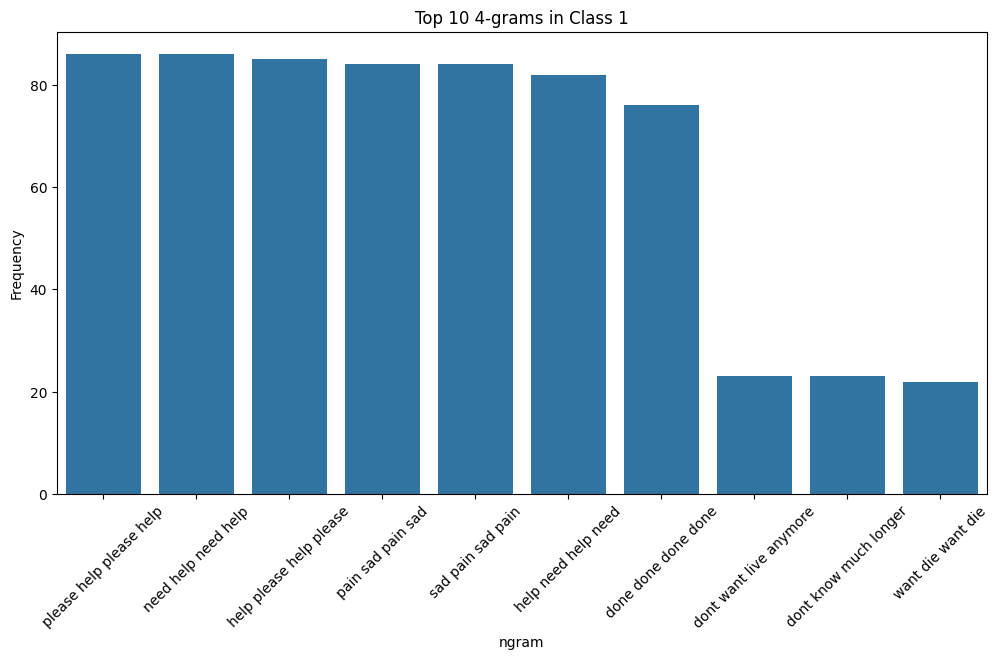

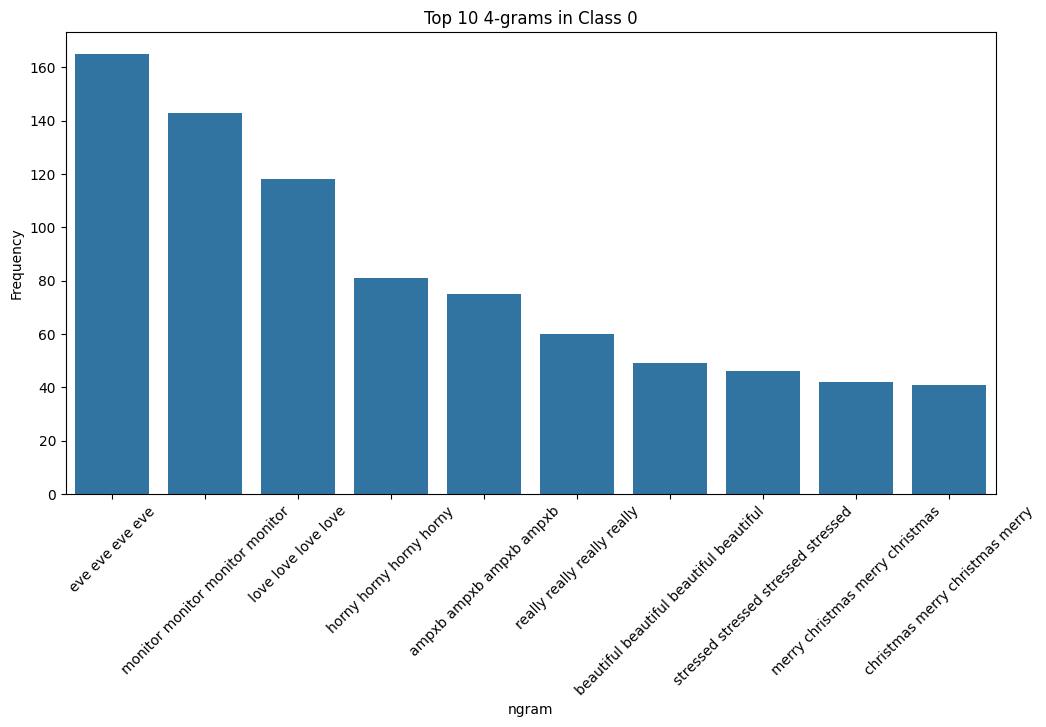


Top 10 5-grams for Class 1:
[(('help', 'please', 'help', 'please', 'help'), 85), (('pain', 'sad', 'pain', 'sad', 'pain'), 84), (('please', 'help', 'please', 'help', 'please'), 84), (('sad', 'pain', 'sad', 'pain', 'sad'), 83), (('need', 'help', 'need', 'help', 'need'), 82), (('help', 'need', 'help', 'need', 'help'), 82), (('done', 'done', 'done', 'done', 'done'), 74), (('please', 'kill', 'please', 'kill', 'please'), 21), (('kill', 'please', 'kill', 'please', 'kill'), 20), (('please', 'please', 'please', 'please', 'please'), 18)]

Top 10 5-grams for Class 0:
[(('eve', 'eve', 'eve', 'eve', 'eve'), 163), (('monitor', 'monitor', 'monitor', 'monitor', 'monitor'), 142), (('love', 'love', 'love', 'love', 'love'), 117), (('horny', 'horny', 'horny', 'horny', 'horny'), 80), (('ampxb', 'ampxb', 'ampxb', 'ampxb', 'ampxb'), 69), (('really', 'really', 'really', 'really', 'really'), 59), (('beautiful', 'beautiful', 'beautiful', 'beautiful', 'beautiful'), 48), (('stressed', 'stressed', 'stressed', 'st

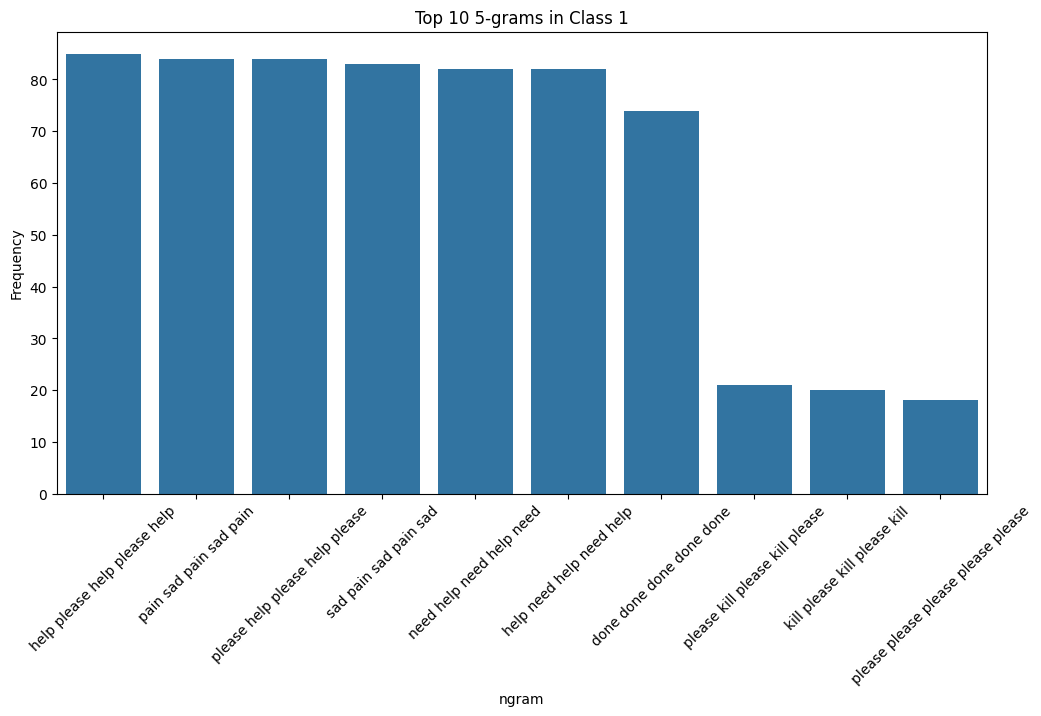

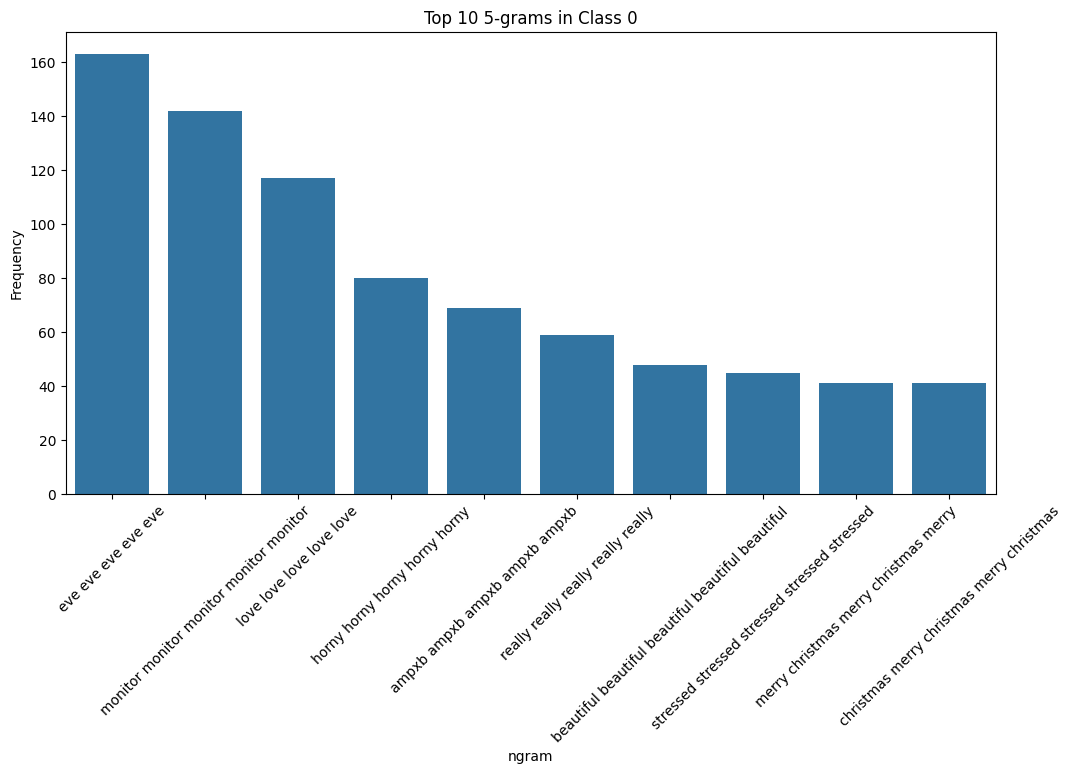

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
from collections import Counter

# Load the cleaned dataset
df = pd.read_csv('data/google/mhc_revision_b.csv')

# Ignore problematic rows with indices [6579, 13183, 13268]
rows_to_ignore = [6579, 13183, 13268]
df = df.drop(index=rows_to_ignore)

# Class distribution
class_distribution = df['label'].value_counts(normalize=True)
print("Class Distribution:\n", class_distribution)

# Token analysis
df['tokens'] = df['text'].apply(lambda x: x.split())
total_tokens = df['tokens'].apply(len).sum()
unique_tokens = len(set([token for sublist in df['tokens'] for token in sublist]))

print(f"\nTotal Tokens: {total_tokens}")
print(f"Unique Tokens: {unique_tokens}")

# Add total_token column
df['total_token'] = df['tokens'].apply(len)

# Add a column for document length
df['document_length'] = df['tokens'].apply(len)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['document_length'].quantile(0.25)
Q3 = df['document_length'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['document_length'] >= lower_bound) & (df['document_length'] <= upper_bound)]

# Print the shape of the DataFrame after dropping outliers
print(f"DataFrame shape after removing outliers: {df.shape}")

# Display box plots for document length by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='document_length', data=df)
plt.title('Document Length Distribution by Class')
plt.xlabel('Class (0 or 1)')
plt.ylabel('Document Length')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

# Plot top 30 most common words for class 1
class_1_words = df[df['label'] == 1]['tokens'].explode()
top_30_class_1 = class_1_words.value_counts().nlargest(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_class_1.index, y=top_30_class_1.values)
plt.title('Top 30 Most Common Words in Class 1')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# Plot top 30 most common words for class 0
class_0_words = df[df['label'] == 0]['tokens'].explode()
top_30_class_0 = class_0_words.value_counts().nlargest(30)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_class_0.index, y=top_30_class_0.values)
plt.title('Top 30 Most Common Words in Class 0')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# N-gram analysis (n = 2 to n = 5)
for n in range(2, 6):
    print(f"\nTop 10 {n}-grams for Class 1:")
    class_1_ngrams = df[df['label'] == 1]['text'].apply(lambda x: list(ngrams(x.split(), n))).explode()
    top_10_class_1_ngrams = Counter(class_1_ngrams).most_common(10)
    print(top_10_class_1_ngrams)

    print(f"\nTop 10 {n}-grams for Class 0:")
    class_0_ngrams = df[df['label'] == 0]['text'].apply(lambda x: list(ngrams(x.split(), n))).explode()
    top_10_class_0_ngrams = Counter(class_0_ngrams).most_common(10)
    print(top_10_class_0_ngrams)

    # Prepare DataFrames for plotting
    ngram_df_class_1 = pd.DataFrame(top_10_class_1_ngrams, columns=['ngram', 'frequency'])
    ngram_df_class_1['ngram'] = ngram_df_class_1['ngram'].apply(lambda x: ' '.join(x))  # Convert n-grams to string

    ngram_df_class_0 = pd.DataFrame(top_10_class_0_ngrams, columns=['ngram', 'frequency'])
    ngram_df_class_0['ngram'] = ngram_df_class_0['ngram'].apply(lambda x: ' '.join(x))  # Convert n-grams to string

    # Plot for Class 1
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ngram', y='frequency', data=ngram_df_class_1)
    plt.title(f'Top 10 {n}-grams in Class 1')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

    # Plot for Class 0
    plt.figure(figsize=(12, 6))
    sns.barplot(x='ngram', y='frequency', data=ngram_df_class_0)
    plt.title(f'Top 10 {n}-grams in Class 0')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()


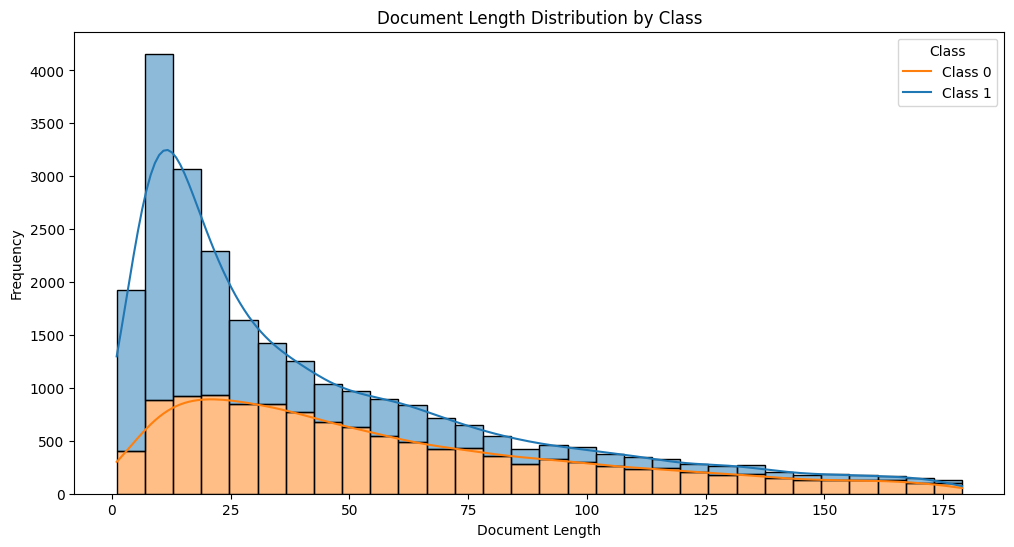

In [23]:
# Plot the distribution of document length for both classes
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='document_length', hue='label', multiple='stack', bins=30, kde=True)
plt.title('Document Length Distribution by Class')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Class 0', 'Class 1'])
plt.show()

In [40]:
import pandas as pd
from collections import Counter

# Load the final dataset
df = pd.read_csv('data/google/mhc_revision_final.csv')

# Initialize a list to log indices of troubled rows
troubled_rows = []

# Tokenize the text column and count word occurrences
all_words = []
for index, text in df['text'].items():
    try:
        # Check for float values and skip them
        if isinstance(text, float):
            troubled_rows.append(index)
            continue
        
        # Tokenize and extend the list of all words
        all_words.extend(text.split())
    except Exception as e:
        troubled_rows.append(index)

# Count word occurrences
word_counts = Counter(all_words)

# Identify words with frequency = 1
words_to_remove = {word for word, count in word_counts.items() if count == 1}

# Remove words with frequency = 1 from the 'text' column
def clean_text(text):
    try:
        if isinstance(text, float):
            troubled_rows.append(text.name)  # Log troubled row index
            return ''  # Replace with empty string if it's a float
        return ' '.join([word for word in text.split() if word not in words_to_remove])
    except Exception as e:
        troubled_rows.append(text)  # Log troubled row index
        return ''  # Replace with empty string in case of error

df['text'] = df['text'].apply(clean_text)

# Drop rows where the 'text' column is empty
df = df[df['text'].str.strip() != '']

# Drop troubled rows
df.drop(index=troubled_rows, inplace=True, errors='ignore')

# Re-tokenize the cleaned text column
all_words_cleaned = df['text'].str.split().explode()

# Calculate unique tokens and total tokens after removing low-frequency words
unique_tokens_cleaned = len(set(all_words_cleaned))
total_tokens_cleaned = all_words_cleaned.count()

print(f"\nUnique Tokens after removing low-frequency words: {unique_tokens_cleaned}")
print(f"Total Tokens after removing low-frequency words: {total_tokens_cleaned}")

# Keep only the specified columns and move 'label' to the last position
df = df[['text', 'total_token', 'label']]

# Save the final DataFrame to a new CSV file
df.to_csv('data/google/mhc_revision_final.csv', index=False)
print("Final DataFrame saved to 'data/google/mhc_revision_final.csv'.")

# Log troubled rows
if troubled_rows:
    print(f"\nTroubled rows dropped: {troubled_rows}")
else:
    print("\nNo troubled rows encountered.")


Unique Tokens after removing low-frequency words: 20097
Total Tokens after removing low-frequency words: 1140745
Final DataFrame saved to 'data/google/mhc_revision_final.csv'.

Troubled rows dropped: [3109, 3788, 9733, 9863, 10453, 10610, 13103, 14426, 16850, 23841, 25644, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


(25782, 3)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2705
           1       0.92      0.90      0.91      2452

    accuracy                           0.92      5157
   macro avg       0.92      0.92      0.92      5157
weighted avg       0.92      0.92      0.92      5157


Confusion Matrix:
 [[2526  179]
 [ 248 2204]]


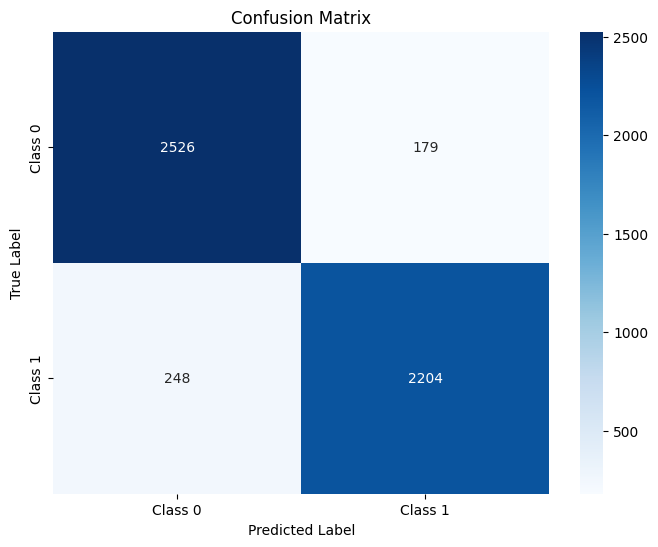

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final dataset
df = pd.read_csv('data/google/mhc_revision_final.csv')

print(df.shape)

# Split the dataset into features and target
X = df['text']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the TF-IDF vectorizer with a maximum of 2500 features
tfidf_vectorizer = TfidfVectorizer(max_features=2500)

# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_tfidf)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

(25782, 3)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      2705
           1       0.89      0.92      0.90      2452

    accuracy                           0.91      5157
   macro avg       0.91      0.91      0.91      5157
weighted avg       0.91      0.91      0.91      5157


Confusion Matrix:
 [[2426  279]
 [ 205 2247]]


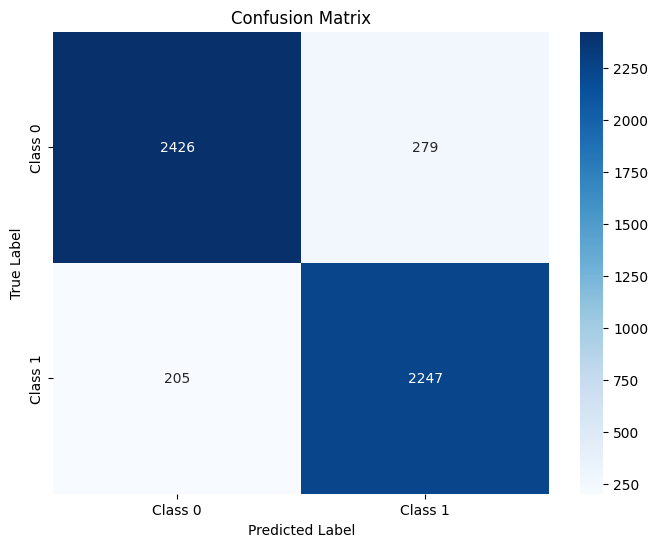

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
import numpy as np

# Load the final dataset
df = pd.read_csv('data/google/mhc_revision_final.csv')

print(df.shape)

# Split the dataset into features and target
X = df['text']
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the text for Word2Vec
# Tokenizing the text
X_train_tokens = [text.split() for text in X_train]
X_test_tokens = [text.split() for text in X_test]

# Train Word2Vec model on training data
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Function to get average Word2Vec for a given text
def get_average_word2vec(tokens, model):
    if len(tokens) == 0:
        return np.zeros(model.vector_size)
    vector = np.mean([model.wv[word] for word in tokens if word in model.wv], axis=0)
    return vector

# Create Word2Vec feature vectors for the training and testing data
X_train_w2v = np.array([get_average_word2vec(tokens, w2v_model) for tokens in X_train_tokens])
X_test_w2v = np.array([get_average_word2vec(tokens, w2v_model) for tokens in X_test_tokens])

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train_w2v, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_w2v)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [71]:
import numpy as np

# Define the new samples
new_samples = [
    "i really dont think im alive anymore i wish i can peaceful death in my sleep why live anymore",
    "oranges fucking suck vitamin is but i would kill for apple",
    "will buy rope weekend ready end it all",
    "cat is playing rope i buy school family not pick up",
    "the workload and the pressure of exams have been incredibly demanding, leaving me with little time or energy for anything else",
    "going insane",
    "despite these struggles, I’ve been able to find solace in my passions"
    "For most of my life, I believed I hated math",
    "Despite the busy and challenging times I’ve been navigating, I still have a lot of projects that I haven’t covered on this blog",
    "kill myself"
]

# Tokenize the new samples
new_samples_tokens = [sample.split() for sample in new_samples]

# Create Word2Vec feature vectors for the new samples
new_samples_w2v = np.array([get_average_word2vec(tokens, w2v_model) for tokens in new_samples_tokens])

# Predict using the trained logistic regression model
predictions = log_reg.predict(new_samples_w2v)

# Print predictions
for sample, prediction in zip(new_samples, predictions):
    print(f"Sample: '{sample}' \nPredicted Label: {prediction}\n")

Sample: 'i really dont think im alive anymore i wish i can peaceful death in my sleep why live anymore' 
Predicted Label: 1

Sample: 'oranges fucking suck vitamin is but i would kill for apple' 
Predicted Label: 0

Sample: 'will buy rope weekend ready end it all' 
Predicted Label: 1

Sample: 'cat is playing rope i buy school family not pick up' 
Predicted Label: 0

Sample: 'the workload and the pressure of exams have been incredibly demanding, leaving me with little time or energy for anything else' 
Predicted Label: 0

Sample: 'going insane' 
Predicted Label: 1

Sample: 'despite these struggles, I’ve been able to find solace in my passionsFor most of my life, I believed I hated math' 
Predicted Label: 0

Sample: 'Despite the busy and challenging times I’ve been navigating, I still have a lot of projects that I haven’t covered on this blog' 
Predicted Label: 0

Sample: 'kill myself' 
Predicted Label: 1



Explained Variance Ratio for 3 components: [0.00347866 0.00313278 0.00150527]


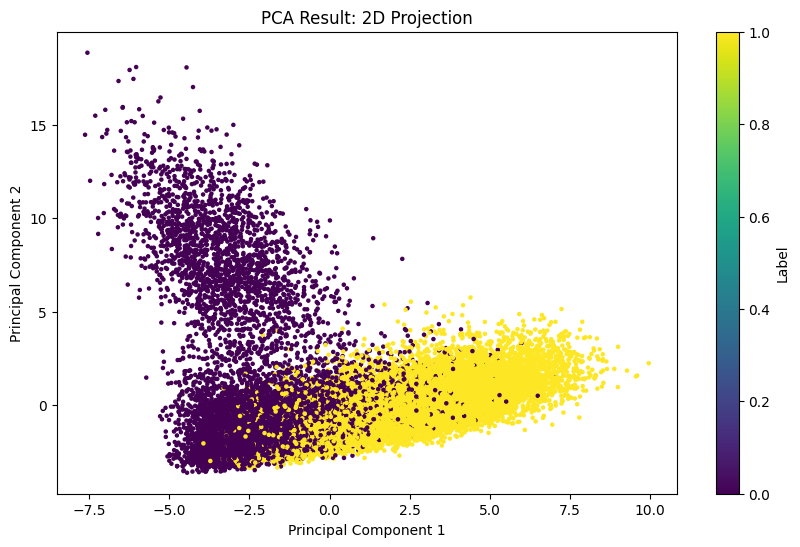

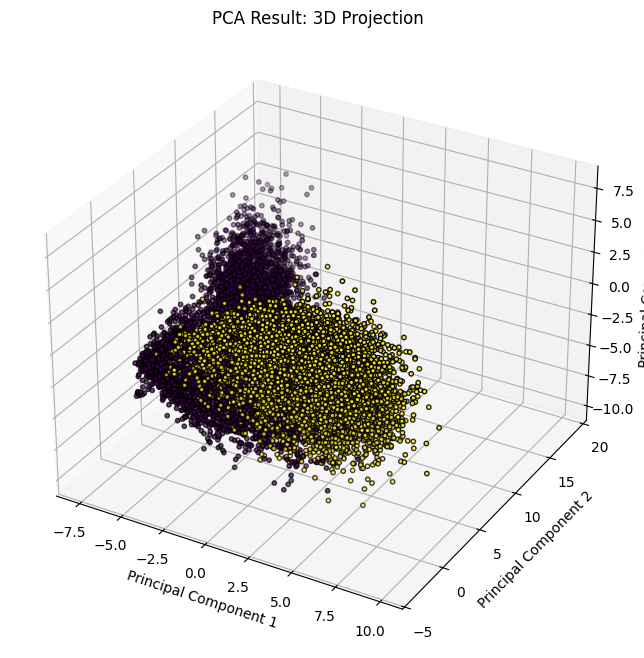

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the final dataset
df = pd.read_csv('data/google/mhc_revision_final.csv')

# Prepare the text data for PCA
tfidf_vectorizer = TfidfVectorizer(max_features=2500)
X_tfidf = tfidf_vectorizer.fit_transform(df['text']).toarray()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tfidf)

# Perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance
print("Explained Variance Ratio for 3 components:", pca.explained_variance_ratio_)

# Plotting 2D PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], cmap='viridis', s=5)
plt.title('PCA Result: 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

# Plotting 3D PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['label'], cmap='viridis', edgecolor='k', s=10)
ax.set_title('PCA Result: 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

Explained Variance Ratio for LDA components: [1.]


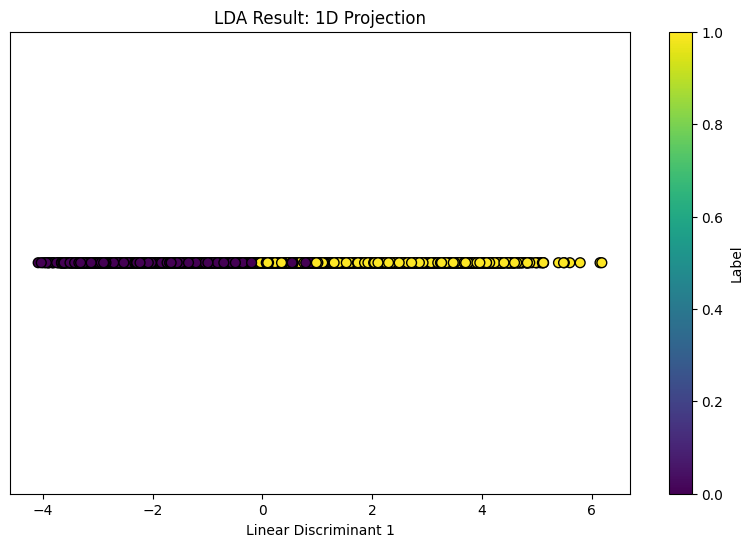

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Load the final dataset
df = pd.read_csv('data/google/mhc_revision_final.csv')

# Prepare the text data for LDA
tfidf_vectorizer = TfidfVectorizer(max_features=2500)
X_tfidf = tfidf_vectorizer.fit_transform(df['text']).toarray()

# Get the labels
y = df['label']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tfidf)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Only 1 component for 2 classes
X_lda = lda.fit_transform(X_scaled, y)

# Print explained variance
print("Explained Variance Ratio for LDA components:", lda.explained_variance_ratio_)

# Create a DataFrame for the LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD 1'])
lda_df['Label'] = y

# Plotting 2D LDA
plt.figure(figsize=(10, 6))
plt.scatter(lda_df['LD 1'], np.zeros_like(lda_df['LD 1']), c=lda_df['Label'], cmap='viridis', edgecolor='k', s=50)
plt.title('LDA Result: 1D Projection')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])  # Hide y-axis ticks since we only have one dimension
plt.colorbar(label='Label')
plt.show()